In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import scipy.stats
from tqdm.notebook import tqdm
import os


pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "half_filling"

os.makedirs(output_dir, exist_ok=True)

# Try some modes on L=12 and L=16 and see what hapens

In [3]:
n = 12
ne = 128
k = 2000


amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
knums = [1,2,3,6]

all_indices = numpy.arange(n)
for knum in tqdm(knums):
    indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
    s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(purities)
    all_ds.append(D)

  0%|          | 0/4 [00:00<?, ?it/s]

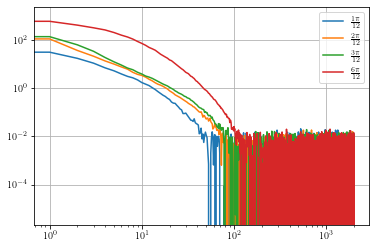

In [4]:
for knum,d,purs in zip(knums,all_ds, all_purities):
    pyplot.plot(d*purs - 1, label=fr'$\frac{{ {knum}\pi }}{{ {n} }}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.legend()
pyplot.show()

In [5]:
n = 16
ne = 128
k = 2000


amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
knums = [1,2,4,8]

all_indices = numpy.arange(n)
for knum in tqdm(knums):
    indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
    s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
    purities = s.apply_alternative_layers_and_save_mean_purity(k)
    D = len(s.get_enumerated_states())
    all_purities.append(purities)
    all_ds.append(D)

  0%|          | 0/4 [00:00<?, ?it/s]

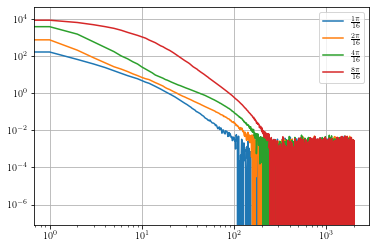

In [6]:
for knum,d,purs in zip(knums,all_ds, all_purities):
    pyplot.plot(d*purs - 1, label=fr'$\frac{{ {knum}\pi }}{{ {n} }}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.grid()
pyplot.legend()
pyplot.show()

# Bunches of size $k_{num}$
Pure initial states with $k_{num}$ spins up, then $k_{num}$ down, etc... All states are half filling but correspond to different momenta

Can't do finite sized scaling on arbitrary modes, can't really run past L=20

Something to note: First half of plots seem to collapse with $1/L^2$ scaling, second half collapse with $1/L$

In [20]:
max_n = 21
k = 500
ne = 64

## $k_{num}$ = 1

In [21]:
knum = 1

amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
ns = numpy.arange(2*knum,max_n,2*knum)


single_filename = os.path.join(output_dir, f"knum_{knum}.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    all_purities = arr['data']
    all_ds = arr['ds']
else:
    for n in tqdm(ns):
        all_indices = numpy.arange(n)
        indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
        s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_ds.append(D)
    numpy.savez(single_filename, data=all_purities, ds=all_ds)

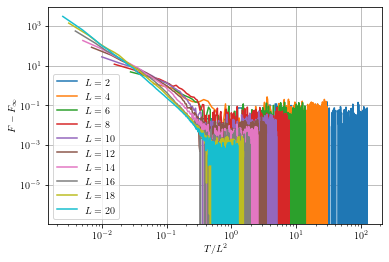

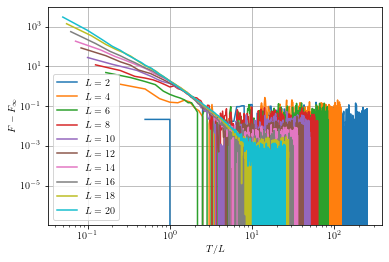

In [22]:
for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/(n**2),d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/n,d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L$')
pyplot.grid()
pyplot.legend()
pyplot.show()

## $k_{num}$ = 2

In [23]:
knum = 2

amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
ns = numpy.arange(2*knum,max_n,2*knum)


single_filename = os.path.join(output_dir, f"knum_{knum}.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    all_purities = arr['data']
    all_ds = arr['ds']
else:
    for n in tqdm(ns):
        all_indices = numpy.arange(n)
        indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
        s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_ds.append(D)
    numpy.savez(single_filename, data=all_purities, ds=all_ds)

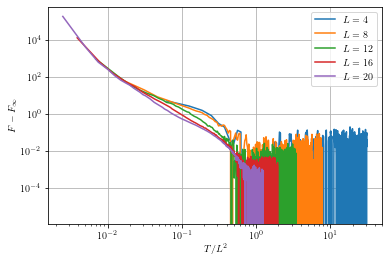

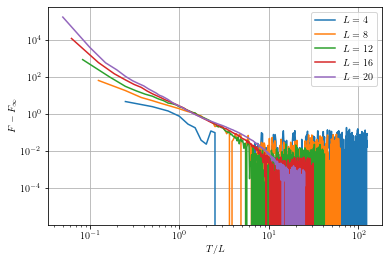

In [24]:
for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/(n**2),d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/n,d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L$')
pyplot.grid()
pyplot.legend()
pyplot.show()

## $k_{num}$ = 3

In [25]:
knum = 3

amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
ns = numpy.arange(2*knum,max_n,2*knum)


single_filename = os.path.join(output_dir, f"knum_{knum}.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    all_purities = arr['data']
    all_ds = arr['ds']
else:
    for n in tqdm(ns):
        all_indices = numpy.arange(n)
        indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
        s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_ds.append(D)
    numpy.savez(single_filename, data=all_purities, ds=all_ds)

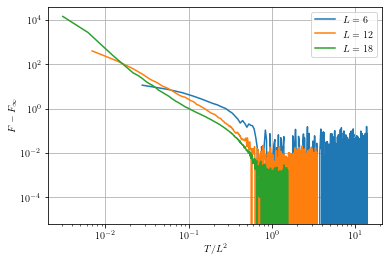

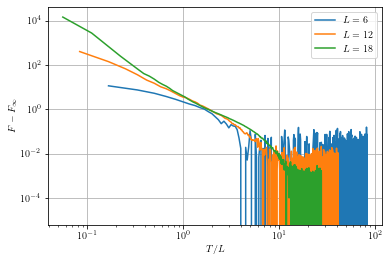

In [26]:
for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/(n**2),d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/n,d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L$')
pyplot.grid()
pyplot.legend()
pyplot.show()

## $k_{num}$ = 4

In [27]:
knum = 4

amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
ns = numpy.arange(2*knum,max_n,2*knum)


single_filename = os.path.join(output_dir, f"knum_{knum}.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    all_purities = arr['data']
    all_ds = arr['ds']
else:
    for n in tqdm(ns):
        all_indices = numpy.arange(n)
        indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
        s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_ds.append(D)
    numpy.savez(single_filename, data=all_purities, ds=all_ds)

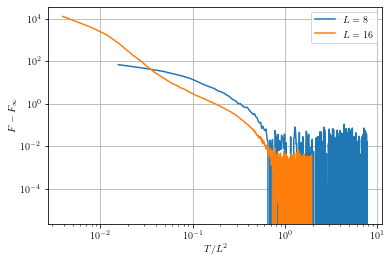

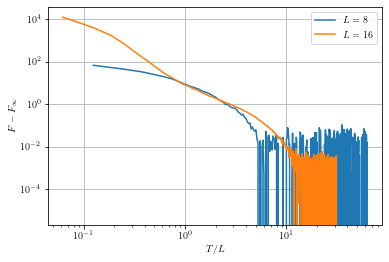

In [28]:
for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/(n**2),d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/n,d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L$')
pyplot.grid()
pyplot.legend()
pyplot.show()

## $k_{num}$ = 5

In [29]:
knum = 5

amps = numpy.array([1.0], dtype=numpy.complex128)
all_purities = []
all_ds = []
ns = numpy.arange(2*knum,max_n,2*knum)


single_filename = os.path.join(output_dir, f"knum_{knum}.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    all_purities = arr['data']
    all_ds = arr['ds']
else:
    for n in tqdm(ns):
        all_indices = numpy.arange(n)
        indx = all_indices[(numpy.arange(n) // knum) % 2 == 0]
        s = py_entropy.MultiDefectState([indx], amps, n, n//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_ds.append(D)
    numpy.savez(single_filename, data=all_purities, ds=all_ds)

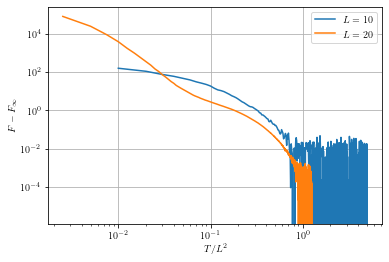

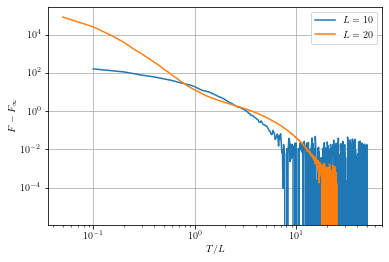

In [30]:
for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/(n**2),d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L^2$')
pyplot.grid()
pyplot.legend()
pyplot.show()

for n,d,purs in zip(ns,all_ds, all_purities):
    pyplot.plot(numpy.arange(1,len(purs)+1)/n,d*purs - 1, label=fr'$L={n}$')
    
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.ylabel('$F - F_\infty$')
pyplot.xlabel('$T/L$')
pyplot.grid()
pyplot.legend()
pyplot.show()